In [105]:
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_MesoWest.get_MesoWest import get_mesowest_radius
from BB_HRRR.HRRR_Pando import get_hrrr_variable, hrrr_subset
from BB_wx_calcs.wind import wind_spddir_to_uv

In [34]:
STID = 'UCSC'
m = draw_centermap(STID, size=(1.5,2.5))


Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/metadata?&token=2562b729557f45f5958516081f06c9eb&stid=UCSC



In [54]:
import numpy as np

In [55]:
states = np.genfromtxt('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/data/states_latlon.csv', names=True, delimiter=',', dtype=None, encoding='UTF-8')

In [65]:
mCA = draw_centermap('California', size=(6.5,5.5))

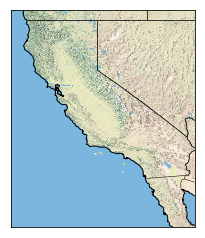

In [126]:
mCA.drawcoastlines()
mCA.drawstates()
mCA.drawcountries()
mCA.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=50000)
plt.savefig('CA', transparent=True)

In [112]:
b = get_mesowest_radius(datetime(2017, 10, 14, 13), STID, radius=200, verbose=False, variables='wind_speed,wind_direction')

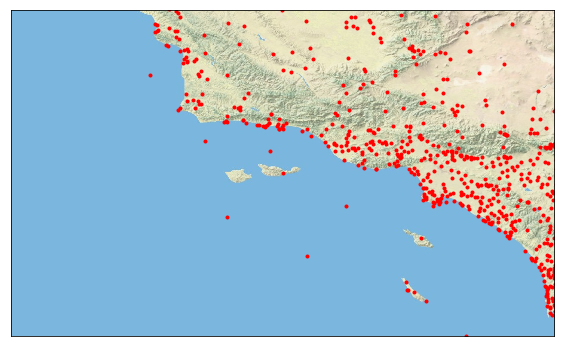

In [124]:
plt.figure(figsize=[10,6])
m.scatter(b['LON'], b['LAT'], marker='.', color='r')
#m.drawcoastlines()
m.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=50000)
plt.savefig('Southern_California', bbox_inches='tight')

In [114]:
bu, bv = wind_spddir_to_uv(b['wind_speed'], b['wind_direction'])

In [109]:
DATE = datetime(2017, 10, 14, 13)
H = get_hrrr_variable(DATE, 'UVGRD:10 m')


 >> Dowloading tempfile: ./temp_hrrr_2017101413_f00_UVG.grib2
Oh, good, you requested a date that should be on Pando.
GRIB2 File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20171014/hrrr.t13z.wrfsfcf00.grib2
 .idx File: https://pando-rgw01.chpc.utah.edu/hrrr/sfc/20171014/hrrr.t13z.wrfsfcf00.grib2.idx
 >> Matched a variable:  59:40476072:d=2017101413:UGRD:10 m above ground:anl
 >> Byte Range: 40476072 42974161
 >> Converting winds to earth-relative
  Run Date: 2017-10-14 13:00 UTC F00
Valid Date: 2017-10-14 13:00 UTC


 >> Requested Center lat: 35.43361	 lon: -119.05667
 >>     Plucked HRRR lat: 35.42243519091162	 lon: -119.05884175084657
 >>     Plucked from   x: 491	   y: 253
 >> Size of subset: 50 x 50 grid points


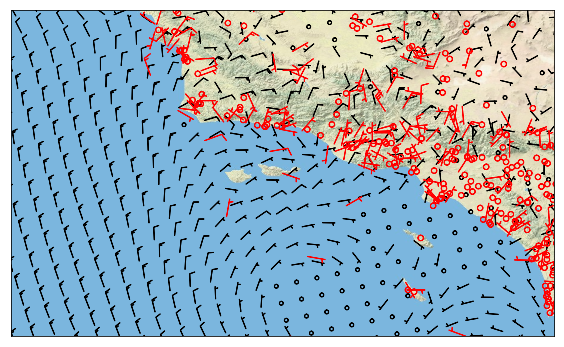

In [123]:
Hs = hrrr_subset(H, half_box=150, lat=b['LAT'][0], lon=b['LON'][0], thin=6)

plt.figure(figsize=[10,6])
m.barbs(Hs['lon'], Hs['lat'], Hs['UGRD'], Hs['VGRD'], latlon=True,
        barb_increments=dict(half=2.5, full=5, flag=25), length=5)
m.barbs(b['LON'], b['LAT'], bu, bv, latlon=True, color='r',
        barb_increments=dict(half=2.5, full=5, flag=25), length=6)
#m.drawcoastlines()
m.arcgisimage(service='World_Physical_Map', dpi=1500, xpixels=50000)

plt.savefig('Southern_California_winds_%s' % (DATE.strftime('%Y-%m-%d_%H%M')),
             bbox_inches='tight')

dict_keys(['URL', 'NAME', 'STID', 'LAT', 'LON', 'ELEVATION', 'DATETIME', 'wind_speed', 'wind_speed_DATETIME'])